In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plot_cum_dist, plot_dist
from sw_utilities import tukeyTest

# make a folder to store figures if not already there
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
# contorl
df = pd.read_csv('../data/SMG-post-division-return-time/180218-mTmGHisG-2photon-cell-division-returning-time.csv')
df.rename(columns={'anaphase_to_surface_return':'AO_to_SR_minutes'}, inplace=True)
df['AO_to_SR_frames'] = df.AO_to_SR_minutes / 5
df['AO_to_SR_hours'] = df.AO_to_SR_minutes / 60
df['group_id'] = ['control']*len(df)
df1 = df[['group_id', 'AO_to_SR_minutes', 'AO_to_SR_hours']]

# collagenase
df = pd.read_csv('../data/SMG-post-division-return-time/20210124-K14RhisG-2p-collagenase-post-division-return.csv')
df['AO_to_SR_minutes'] = df.AO_to_SR_frames * 5
df['AO_to_SR_hours'] = df.AO_to_SR_minutes / 60
df['group_id'] = ['collagenase']*len(df)
df2 = df[['group_id', 'AO_to_SR_minutes', 'AO_to_SR_hours']]

df = pd.concat([df1, df2])
df.head()


,group_id,AO_to_SR_minutes,AO_to_SR_hours
0,control,225.0,3.750000
1,control,50.0,0.833333
2,control,90.0,1.500000
3,control,85.0,1.416667
4,control,75.0,1.250000


In [3]:
# slowest return time
df1.AO_to_SR_hours.max()

12.333333333333334

In [4]:
# number of cells returned after >12 hours
df1[df1.AO_to_SR_hours>12]

,group_id,AO_to_SR_minutes,AO_to_SR_hours
67,control,740,12.333333


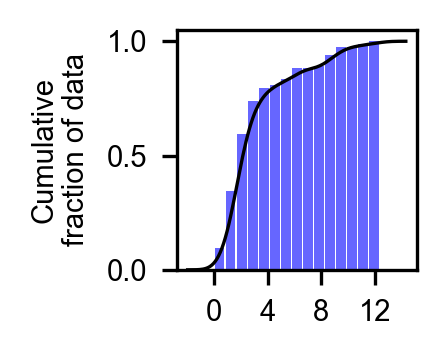

In [5]:
dataset_prefix = '180218-post-division-return-time'
output_fig_path = '../jupyter_figures/' + dataset_prefix + '-CDF.svg'
plot_cum_dist(df1.AO_to_SR_hours, n_bins=15, output_fig_path=None, x_ticks=[0,4,8,12])

# output_fig_path = '../jupyter_figures/' + dataset_prefix + '-distribution.svg'
# plot_dist(df.anaphase_to_surface_return, n_bins=12, output_fig_path=output_fig_path, x_ticks=[0,400,800])
# plot_dist(return_time_data, n_bins=12, x_ticks=[0,300,600,900])


Summary of test:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1    group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
collagenase control -187.316 0.0014 -299.9276 -74.7044   True
-------------------------------------------------------------
p values of all pair-wise tests:
 [0.00135951]


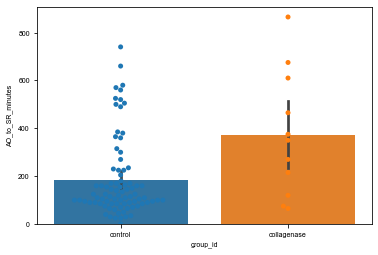

In [6]:
# df.dropna(inplace=True)
sns.swarmplot(data=df, x='group_id', y='AO_to_SR_minutes')
sns.barplot(data=df, x='group_id', y='AO_to_SR_minutes')
tukeyTest(df.dropna().AO_to_SR_minutes, df.dropna().group_id)

In [7]:
from scipy.stats import ttest_ind
ttest_ind(df1.AO_to_SR_hours, df2.dropna().AO_to_SR_hours)

Ttest_indResult(statistic=-3.30314617081286, pvalue=0.001358002642491236)

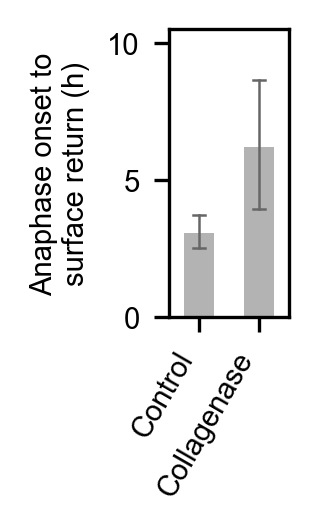

In [8]:
# Composite wwarm and bar plot of different collagenase concentrations

outputPrefix = 'SMG-collagenase-post-division-return-time-bar'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width, fig_height = 0.5, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'AO_to_SR_hours'

# ax = sns.swarmplot(x=xCol, y=yCol, data=df,
#                    color="blue",
#                    size=1.0,
#                    alpha=.4)

ax = sns.barplot(x=xCol, y=yCol, data=df,
                 color=".7", alpha=1.0,
                 errwidth=.6, errcolor=".4", capsize=.2, ci=95)

plt.ylim(0, 10.5)
plt.yticks([0, 5, 10])

plt.xlabel("")
plt.ylabel("Anaphase onset to\nsurface return (h)")

# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .5)

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


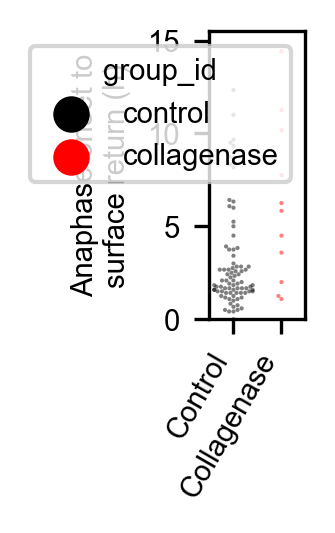

In [9]:
# Composite wwarm and bar plot of different collagenase concentrations

outputPrefix = 'SMG-collagenase-post-division-return-time-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width, fig_height = 0.4, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'AO_to_SR_hours'

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(x=xCol, y=yCol, data=df,
                   hue='group_id', palette=paletteDict,
#                    color='Gray',
#                    color="blue",
                   alpha=.5,
                   size=1.0)

# ax = sns.barplot(x=xCol, y=yCol, data=df,
#                  color=".7", alpha=1.0,
#                  errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 15.5)
plt.yticks([0, 5, 10, 15])

plt.xlabel("")
plt.ylabel("Anaphase onset to\nsurface return (h)")

# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .6)

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


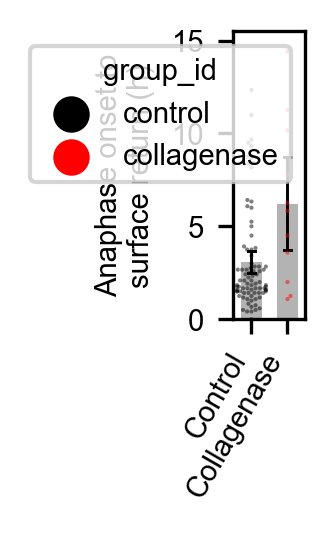

In [10]:
# Composite wwarm and bar plot of different collagenase concentrations

outputPrefix = 'SMG-collagenase-post-division-return-time-bar-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width, fig_height = 0.3, 1.2
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'AO_to_SR_hours'

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(x=xCol, y=yCol, data=df,
                   hue='group_id', palette=paletteDict,
#                    color='Gray',
#                    color="blue",
                   alpha=.5,
                   size=1.0)

ax = sns.barplot(x=xCol, y=yCol, data=df,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 15.5)
plt.yticks([0, 5, 10, 15])

plt.xlabel("")
plt.ylabel("Anaphase onset to\nsurface return (h)")

# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .6)

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [11]:
df2.head()

,group_id,AO_to_SR_minutes,AO_to_SR_hours
0,collagenase,120.0,2.000000
1,collagenase,215.0,3.583333
2,collagenase,75.0,1.250000
3,collagenase,610.0,10.166667
4,collagenase,NaN,NaN


In [12]:
df2.isna().sum()

group_id            0
AO_to_SR_minutes    9
AO_to_SR_hours      9
dtype: int64

In [13]:
len(df2)

20

In [14]:
df = pd.read_csv('../data/SMG-post-division-return-time/20210124-K14RhisG-2p-collagenase-post-division-return.csv')
df['AO_to_SR_minutes'] = df.AO_to_SR_frames * 5
df['AO_to_SR_hours'] = df.AO_to_SR_minutes / 60
df['group_id'] = ['collagenase']*len(df)
df.head()

,cell_division_id,daughter_cell_id,track_id,track_start,track_end,start_on_surface,surface_return,AO_to_SR_frames,experimental_group,Unnamed: 9,Unnamed: 10,AO_to_SR_minutes,AO_to_SR_hours,group_id
0,1,1A,0.0,12.0,36.0,no,yes,24.0,collagenase,NaN,NaN,120.0,2.000000,collagenase
1,1,1B,5.0,12.0,55.0,no,yes,43.0,collagenase,NaN,NaN,215.0,3.583333,collagenase
2,2,2A,6.0,133.0,148.0,no,yes,15.0,collagenase,NaN,NaN,75.0,1.250000,collagenase
3,2,2B,8.0,133.0,255.0,no,yes,122.0,collagenase,NaN,NaN,610.0,10.166667,collagenase
4,3,3A,NaN,NaN,NaN,yes,NaN,NaN,collagenase,NaN,NaN,NaN,NaN,collagenase


In [15]:
df.isna().sum()

cell_division_id       0
daughter_cell_id       0
track_id               9
track_start            8
track_end              8
start_on_surface       0
surface_return         8
AO_to_SR_frames        9
experimental_group     0
Unnamed: 9            20
Unnamed: 10           20
AO_to_SR_minutes       9
AO_to_SR_hours         9
group_id               0
dtype: int64

In [16]:
df.groupby('start_on_surface').describe()

cell_division_id                                            \
                            count mean       std  min  25%  50%   75%   max   
start_on_surface                                                              
no                           12.0  4.5  2.876235  1.0  2.0  4.5  6.25  10.0   
yes                           8.0  7.0  2.507133  3.0  5.5  7.5  9.00  10.0   

                 track_id             ... AO_to_SR_minutes         \
                    count       mean  ...              75%    max   
start_on_surface                      ...                           
no                   11.0  30.090909  ...            537.5  865.0   
yes                   0.0        NaN  ...              NaN    NaN   

                 AO_to_SR_hours                                          \
                          count      mean       std       min       25%   
start_on_surface                                                          
no                         11.0  6.189394  4.351419  1.083333  2.791667   
yes                         0.0       NaN       NaN       NaN       NaN   

                                                 
                       50%       75%        max  
start_on_surface                                 
no                5.833333  8.958333  14.416667  
yes                    NaN       NaN        NaN  

[2 rows x 72 columns]

In [17]:
# What if we do not consider the really fast returning cells in control?
df1_filtered = df1[df1.AO_to_SR_hours<=0.5]

In [18]:
ttest_ind(df1_filtered.AO_to_SR_hours, df2.dropna().AO_to_SR_hours)

Ttest_indResult(statistic=-2.9341364294958345, pvalue=0.010882192827607811)